In [10]:
import requests
import pandas as pd
import datetime
# Set your OpenWeatherMap API key
api_key = 'c7112dbcec7a4e6bf9e504007f9d5c9e'

In [11]:
# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764
#https://openweathermap.org/api/one-call-3#howcall
# Construct the API URL
api_url =f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [12]:
response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()
    weather_df = pd.DataFrame({
        'Date': [i['dt_txt'] for i in data['list']],
        'Temperature (°C)': [i['main']['temp'] for i in data['list']],
        'Humidity (%)': [i['main']['humidity'] for i in data['list']]
    })
    weather_df['Date'] = pd.to_datetime(weather_df['Date'])
    print("✅ Weather Data Fetched Successfully:")
    print(weather_df.head())
else:
    print("❌ Error fetching data:", response.text)


✅ Weather Data Fetched Successfully:
                 Date  Temperature (°C)  Humidity (%)
0 2025-11-11 21:00:00            292.88            52
1 2025-11-12 00:00:00            291.46            55
2 2025-11-12 03:00:00            293.99            47
3 2025-11-12 06:00:00            298.92            35
4 2025-11-12 09:00:00            301.44            28


In [15]:
max_temp = weather_df['Temperature (°C)'].max()
min_temp = weather_df['Temperature (°C)'].min()

print(f"Maximum Temperature: {max_temp:.2f} °C")
print(f"Minimum Temperature: {min_temp:.2f} °C")


Maximum Temperature: 301.62 °C
Minimum Temperature: 289.10 °C


C:\Users\tanma\AppData\Local\Temp\ipykernel_21456\2269663397.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['Date'] = pd.date_range(start=pd.Timestamp.today(), periods=len(weather_df), freq='3H')


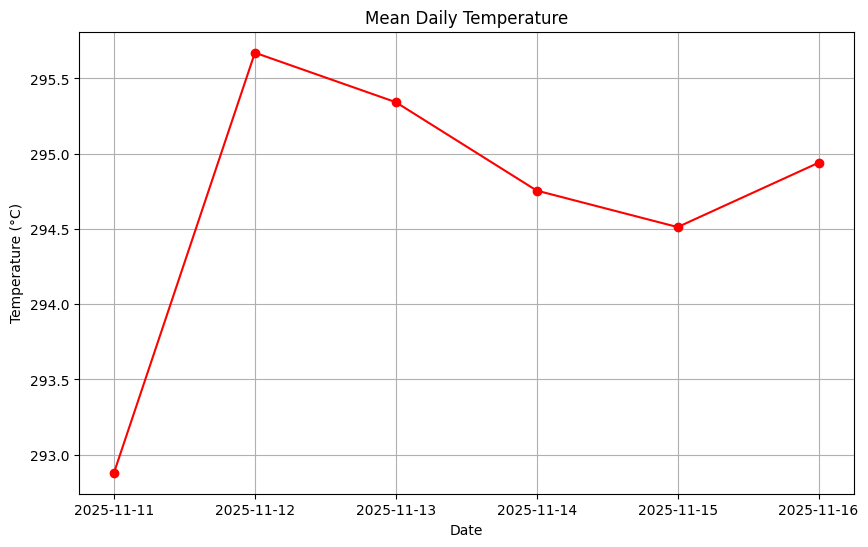

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ If 'Date' doesn't exist, create one
if 'Date' not in weather_df.columns:
    weather_df['Date'] = pd.date_range(start=pd.Timestamp.today(), periods=len(weather_df), freq='3H')

weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df.set_index('Date', inplace=True)

daily_mean_temp = weather_df['Temperature (°C)'].resample('D').mean()
daily_mean_humidity = weather_df['Humidity (%)'].resample('D').mean() if 'Humidity (%)' in weather_df.columns else None
daily_mean_wind_speed = weather_df['Wind Speed'].resample('D').mean() if 'Wind Speed' in weather_df.columns else None

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp, color='red', marker='o', linestyle='-')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


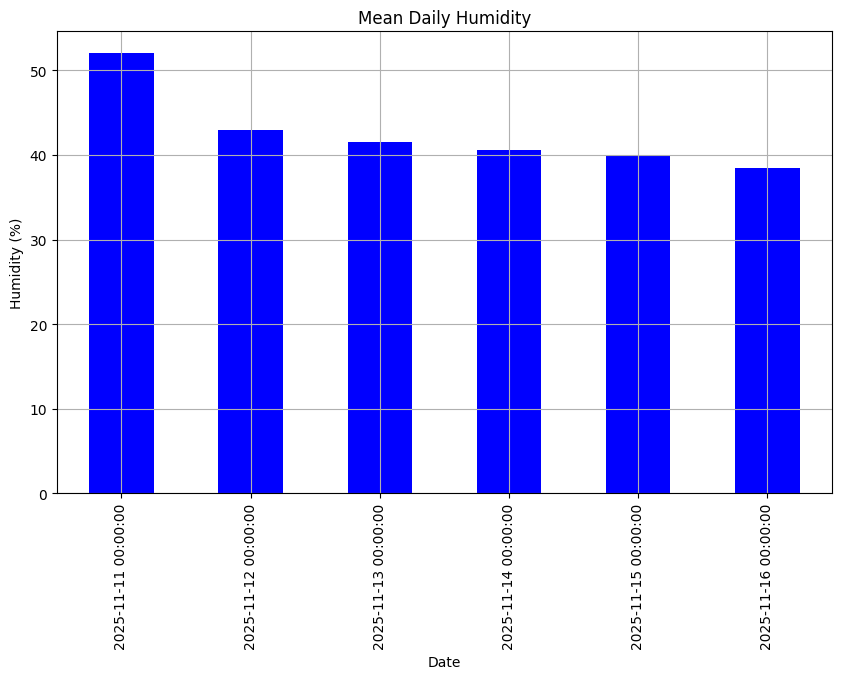

In [20]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

In [21]:
import requests, pandas as pd, folium

api_key = "c7112dbcec7a4e6bf9e504007f9d5c9e"
cities = ['London', 'Paris', 'New York']
data = []

for city in cities:
    r = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric").json()
    data.append({
        'City': city,
        'Temp (°C)': r['main']['temp'],
        'Humidity (%)': r['main']['humidity'],
        'Wind (m/s)': r['wind']['speed'],
        'Lat': r['coord']['lat'],
        'Lon': r['coord']['lon']
    })

df = pd.DataFrame(data)
print(df)

m = folium.Map(location=[df['Lat'].mean(), df['Lon'].mean()], zoom_start=2)
for _, x in df.iterrows():
    folium.Marker([x['Lat'], x['Lon']], popup=f"{x['City']}: {x['Temp (°C)']}°C, {x['Humidity (%)']}%").add_to(m)

m.save("weather_map.html")
print("✅ Map saved as weather_map.html")


       City  Temp (°C)  Humidity (%)  Wind (m/s)      Lat      Lon
0    London      14.64            83        6.69  51.5085  -0.1257
1     Paris      12.59            84        3.60  48.8534   2.3488
2  New York       4.04            50       11.83  40.7143 -74.0060
✅ Map saved as weather_map.html
